## Ask Phase

The City of Toronto releases open data with the public. The datasets used contain information on how visitors interact with the [toronto.ca]("https://www.toronto.ca") website.

### Task/Objective

Analyze traffic and behavior of visitors to a website to improve user experience.

## Prepare Phase

### Datasets License

All datasets used were made available by the [City of Toronto Open Data Portal]("https://open.toronto.ca/about/") under the [Open Government Licence – Toronto]("https://open.toronto.ca/open-data-license/").

### Load R Packages

In [2]:
library(tidyverse) # metapackage of all tidyverse packages
library(skimr)
library(janitor)
library(lubridate)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Import datasets as dataframe

In [3]:

Key_Metrics <- read_csv("/kaggle/input/webanalyticsmonthlyreport/202211/Key Metrics.csv")

Browser <- read_csv("/kaggle/input/webanalyticsmonthlyreport/202211/Browser.csv")

Cities <- read_csv("/kaggle/input/webanalyticsmonthlyreport/202211/Cities.csv")

Countries <- read_csv("/kaggle/input/webanalyticsmonthlyreport/202211/Countries.csv")

Hits_by_Hour_of_Day <- read_csv("/kaggle/input/webanalyticsmonthlyreport/202211/Hits by Hour of Day.csv")

Mobile_Devices <- read_csv("/kaggle/input/webanalyticsmonthlyreport/202211/Mobile Devices.csv")

New_Return_Visitors <- read_csv("/kaggle/input/webanalyticsmonthlyreport/202211/New vs. Return Visitors.csv")

Referring_Site <- read_csv("/kaggle/input/webanalyticsmonthlyreport/202211/Referring Site.csv")

Top_Pages <- read_csv("/kaggle/input/webanalyticsmonthlyreport/202211/Top Pages.csv")

Visits_by_Weekday <- read_csv("/kaggle/input/webanalyticsmonthlyreport/202211/Visits by Day of Week.csv")

Rows: 31 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (8): Day of Month, Users, Sessions, Views, Bounce Rate %, Avg Session Du...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 19 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Browser Name
dbl (2): Sessions, Views

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 251 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): City
dbl (5): Sessions, Views, Avg Session Duration (Sec), Bounce Rate %, Views p...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_typ

### Data Credibility/Bias

All datasets were downloaded from the City of Toronto Open Data Portal and contains web analytics during November 2011 (Last refreshed Dec 4, 2022). Therefore this is original data that is cited and current.


## Process Phase

In [4]:
skim_without_charts(Key_Metrics)
head(Key_Metrics)

,skim_type,skim_variable,n_missing,complete_rate,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,numeric,Day of Month,1,0.9677419,15.5000000,8.803408e+00,1.0000000,8.2500000,15.5000000,22.7500000,3.000000e+01
2,numeric,Users,0,1.0000000,1029.5161290,2.524092e+03,178.0000000,489.0000000,611.0000000,678.5000000,1.460600e+04
3,numeric,Sessions,0,1.0000000,1268.0645161,3.414557e+03,189.0000000,547.5000000,691.0000000,798.0000000,1.964100e+04
4,numeric,Views,0,1.0000000,3168.7741935,8.547626e+03,415.0000000,1254.5000000,1835.0000000,1999.0000000,4.911600e+04
5,numeric,Bounce Rate %,0,1.0000000,0.6190503,5.573922e-02,0.5401786,0.5797582,0.6071483,0.6338777,7.653061e-01
6,numeric,Avg Session Duration (Sec),0,1.0000000,335.8154709,6.024737e+01,206.4308943,305.7300369,333.9990055,359.3880772,4.568050e+02
7,numeric,Screen Views per Session,0,1.0000000,2.4400054,3.376111e-01,1.6462585,2.2325081,2.4020101,2.5483573,3.567500e+00
8,numeric,Sessions (New),0,1.0000000,829.7096774,2.233506e+03,131.0000000,392.5000000,445.0000000,501.0000000,1.285200e+04


── Data Summary ────────────────────────
                           Values     
Name                       Key_Metrics
Number of rows             31         
Number of columns          8          
_______________________               
Column type frequency:                
  numeric                  8          
________________________              
Group variables            None       

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable              n_missing complete_rate     mean        sd      p0
1 Day of Month                       1         0.968   15.5      8.80     1    
2 Users                              0         1     1030.    2524.     178    
3 Sessions                           0         1     1268.    3415.     189    
4 Views                              0         1     3169.    8548.     415    
5 Bounce Rate %                      0         1        0.619    0.0557   0.540
6 Avg Session Duration (Sec)         0        

Day of Month,Users,Sessions,Views,Bounce Rate %,Avg Session Duration (Sec),Screen Views per Session,Sessions (New)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,14606,19641,49116,0.6071483,333.9990,2.500687,12852
2,776,849,2330,0.5653710,306.6764,2.744405,573
7,776,896,2536,0.5401786,391.7025,2.830357,540
8,762,905,2433,0.5756906,434.0632,2.688398,544
1,742,816,1864,0.6139706,262.7846,2.284314,555
3,705,796,1906,0.6344221,270.0429,2.394472,523


Let define some terms:

* Bounce Rate is the percentage of users that enters a site and leaves without taking an action (like viewing other pages, clicking a link, filling a form, etc). Link to [definition](https://backlinko.com/hub/seo/bounce-rate).
* Screen Views Per Session indicates the average number of screens/pages a user views per session.
* Sessions(New) is the number of sessions that consists of new visitors to the website.

Let's add a new column with the exact date.

#### Total Sessions

Calculate total sessions for November

In [5]:
total_sessions <- sum(Key_Metrics$Sessions[-1])

total_sessions

[1] 19669

#### Total Views

In [6]:
total_views <- sum(Key_Metrics$Views[-1])

total_views

[1] 49116

#### Average Session Duration

Let's determine the average session duration for the entire month of November.

In [29]:
average_session_duration <- Key_Metrics %>% 
  summarise(avg_session_duration = mean(`Avg Session Duration (Sec)`))

#convert to a period
seconds_to_period(average_session_duration)

[1] "5M 35.8154709095309S"

So the average session duration for November 2022 was about 5 Minutes 36 Seconds.

#### Average Bounce Rate

Let's calculate the average bounce rate.

In [8]:
avg_bounce_rate <- Key_Metrics %>% 
  summarise(avg_bounce_rate = mean(`Bounce Rate %`))

avg_bounce_rate

avg_bounce_rate
<dbl>
0.6190503


#### Average Screen Views per Session

Let's calculuate the average screen views per session.

In [9]:
avg_screen_views <- Key_Metrics %>% 
  summarise(avg_screen_views = mean(`Screen Views per Session`))

avg_screen_views

avg_screen_views
<dbl>
2.440005


In [10]:
skim_without_charts(Browser)
head(Browser)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,Browser Name,1,0.9473684,4,17,0,18,0,NA,NA,NA,NA,NA,NA,NA
2,numeric,Sessions,0,1.0000000,NA,NA,NA,NA,NA,2060.684,5314.958,1,1.0,6,596,19576
3,numeric,Views,0,1.0000000,NA,NA,NA,NA,NA,5160.526,13176.111,1,1.5,9,1410,49025


── Data Summary ────────────────────────
                           Values 
Name                       Browser
Number of rows             19     
Number of columns          3      
_______________________           
Column type frequency:            
  character                1      
  numeric                  2      
________________________          
Group variables            None   

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 Browser Name          1         0.947   4  17     0       18          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate  mean     sd p0 p25 p50  p75  p100
1 Sessions              0             1 2061.  5315.  1 1     6  596 19576
2 Views                 0             1 5161. 13176.  1 1.5   9 1410 49025


Browser Name,Sessions,Views
<chr>,<dbl>,<dbl>
NA,19576,49025
Chrome,14011,33876
Edge,2112,7404
Safari,2109,4588
Chrome Mobile,656,1247
Firefox,536,1573


There are 18 Unique Browser Names

In [11]:
skim_without_charts(Cities)
head(Cities)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,City,1,0.9960159,1,20,0,250,0,NA,NA,NA,NA,NA,NA,NA
2,numeric,Sessions,0,1.0000000,NA,NA,NA,NA,NA,153.0557769,1339.8347498,3.0000000,4.0000000,7.0000000,17.5000000,19641.00000
3,numeric,Views,0,1.0000000,NA,NA,NA,NA,NA,382.7928287,3300.9100244,2.0000000,9.0000000,19.0000000,48.0000000,49116.00000
4,numeric,Avg Session Duration (Sec),0,1.0000000,NA,NA,NA,NA,NA,328.6082179,311.2490830,0.0000000,99.2407407,266.7500000,431.8088235,1847.59259
5,numeric,Bounce Rate %,0,1.0000000,NA,NA,NA,NA,NA,0.4695135,0.2505604,0.0000000,0.3333333,0.4545455,0.6282895,1.00000
6,numeric,Views per Session,0,1.0000000,NA,NA,NA,NA,NA,3.0768005,3.7915757,0.5555556,1.7571429,2.5714286,3.2971795,48.69565


── Data Summary ────────────────────────
                           Values
Name                       Cities
Number of rows             251   
Number of columns          6     
_______________________          
Column type frequency:           
  character                1     
  numeric                  5     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 City                  1         0.996   1  20     0      250          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable              n_missing complete_rate    mean       sd    p0
1 Sessions                           0             1 153.    1340.    3    
2 Views                              0             1 383.    3301.    2    
3 Avg Session Duration (Sec)         0             1 329.     311.    0    
4 B

City,Sessions,Views,Avg Session Duration (Sec),Bounce Rate %,Views per Session
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,19641,49116,333.9990,0.6071483,2.500687
Toronto,7614,17489,330.0759,0.6369845,2.296953
Boydton,2757,2759,25.0000,0.9992746,1.000725
North York,1310,4518,386.7524,0.4167939,3.448855
Scarborough,741,1746,225.4904,0.5425101,2.356275
Mississauga,548,1713,362.2406,0.4489051,3.125912


In [12]:
skim_without_charts(Countries)
head(Countries)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,Country,1,0.9883721,4,26,0,85,0,NA,NA,NA,NA,NA,NA,NA
2,numeric,Sessions,0,1.0000000,NA,NA,NA,NA,NA,456.7790698,2692.642199,1.0000000,1.0000000,4.0000000,12.0000000,19641.00000
3,numeric,Views,0,1.0000000,NA,NA,NA,NA,NA,1142.2325581,6868.693810,1.0000000,2.2500000,8.5000000,27.0000000,49116.00000
4,numeric,Avg Session Duration (Sec),0,1.0000000,NA,NA,NA,NA,NA,235.3409924,266.644877,0.0000000,26.1000000,135.0066667,376.3333333,1244.90000
5,numeric,Bounce Rate %,0,1.0000000,NA,NA,NA,NA,NA,0.5447809,0.334715,0.0000000,0.4206081,0.5411253,0.8136364,1.00000
6,numeric,Views per Session,0,1.0000000,NA,NA,NA,NA,NA,2.6867815,4.808959,0.6666667,1.1488095,2.0000000,2.9444444,45.23529


── Data Summary ────────────────────────
                           Values   
Name                       Countries
Number of rows             86       
Number of columns          6        
_______________________             
Column type frequency:              
  character                1        
  numeric                  5        
________________________            
Group variables            None     

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 Country               1         0.988   4  26     0       85          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable              n_missing complete_rate     mean       sd    p0
1 Sessions                           0             1  457.    2693.    1    
2 Views                              0             1 1142.    6869.    1    
3 Avg Session Duration (Sec)         0        

Country,Sessions,Views,Avg Session Duration (Sec),Bounce Rate %,Views per Session
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,19641,49116,333.9990,0.6071483,2.500687
Canada,15392,41093,334.3847,0.5437890,2.669764
United States,3392,4318,269.8295,0.9195165,1.272995
United Kingdom,125,534,697.1228,0.3280000,4.272000
India,51,95,120.4048,0.6078431,1.862745
China,49,147,495.7500,0.4489796,3.000000


In [13]:
skim_without_charts(Hits_by_Hour_of_Day)
head(Hits_by_Hour_of_Day)

,skim_type,skim_variable,n_missing,complete_rate,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,numeric,Hour of Day,1,0.96,11.50,7.071068,0,5.75,11.5,17.25,23
2,numeric,Sessions,0,1.00,1612.92,3776.281746,330,485.00,865.0,1283.00,19641
3,numeric,Views,0,1.00,3929.28,9473.393516,462,1085.00,2043.0,3199.00,49116
4,numeric,Clicks,0,1.00,13689.52,33083.127547,1032,2507.00,7485.0,11901.00,171119


── Data Summary ────────────────────────
                           Values             
Name                       Hits_by_Hour_of_Day
Number of rows             25                 
Number of columns          4                  
_______________________                       
Column type frequency:                        
  numeric                  4                  
________________________                      
Group variables            None               

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate    mean       sd   p0     p25    p50
1 Hour of Day           1          0.96    11.5     7.07    0    5.75   11.5
2 Sessions              0          1     1613.   3776.    330  485     865  
3 Views                 0          1     3929.   9473.    462 1085    2043  
4 Clicks                0          1    13690.  33083.   1032 2507    7485  
      p75   p100
1    17.2     23
2  1283    19641
3  3199    49116
4

Hour of Day,Sessions,Views,Clicks
<dbl>,<dbl>,<dbl>,<dbl>
NA,19641,49116,171119
11,1442,3361,12328
14,1440,3764,14055
15,1408,3748,13935
10,1368,3340,11901
13,1365,3280,12440


Let's create a column with the 12 hour time. (12 hour time is easier for viewers to read and understand)

In [14]:
Hits_by_Hour_of_Day <- Hits_by_Hour_of_Day %>% 
  arrange(`Hour of Day`) %>% 
  mutate(time = case_when(
    `Hour of Day` > 12 ~ paste(`Hour of Day`-12,"PM",sep = " "),
    `Hour of Day` == 12 ~ "12 PM",
    `Hour of Day` == 0 ~ "12 AM",
    `Hour of Day` < 12 & `Hour of Day` > 0  ~ paste(`Hour of Day`,"AM",sep = " ")) 
  )

head(Hits_by_Hour_of_Day)

Hour of Day,Sessions,Views,Clicks,time
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,491,1006,3492,12 AM
1,444,847,2506,1 AM
2,382,775,2507,2 AM
3,346,511,1361,3 AM
4,330,462,1032,4 AM
5,367,544,1342,5 AM


In [15]:
skim_without_charts(New_Return_Visitors)
head(New_Return_Visitors)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,New-Returning User,1,0.75,9,27,0,3,0,NA,NA,NA,NA,NA,NA,NA
2,numeric,Sessions,0,1.00,NA,NA,NA,NA,NA,9747.000000,8.351651e+03,3.0000000,4.980000e+03,9.745500e+03,1.451250e+04,19494.000000
3,numeric,Views,0,1.00,NA,NA,NA,NA,NA,24558.000000,2.015832e+04,3.0000000,1.650375e+04,2.455650e+04,3.261075e+04,49116.000000
4,numeric,Clicks,0,1.00,NA,NA,NA,NA,NA,29543.500000,2.415587e+04,7.0000000,2.093650e+04,2.954000e+04,3.814700e+04,59087.000000
5,numeric,Avg Session Duration (Sec),0,1.00,NA,NA,NA,NA,NA,318.924726,1.642510e+02,98.0000000,2.525035e+02,3.478054e+02,4.142267e+02,482.088046
6,numeric,Bounce Rate %,0,1.00,NA,NA,NA,NA,NA,0.683100,2.500150e-01,0.3993071,5.586218e-01,6.665465e-01,7.910247e-01,1.000000
7,numeric,Views per Session,0,1.00,NA,NA,NA,NA,NA,2.235805,9.638446e-01,1.0000000,1.831991e+00,2.314433e+00,2.718247e+00,3.314355
8,numeric,Users,0,1.00,NA,NA,NA,NA,NA,7585.000000,7.238131e+03,3.0000000,2.140500e+03,7.868000e+03,1.331250e+04,14601.000000


── Data Summary ────────────────────────
                           Values             
Name                       New_Return_Visitors
Number of rows             4                  
Number of columns          8                  
_______________________                       
Column type frequency:                        
  character                1                  
  numeric                  7                  
________________________                      
Group variables            None               

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 New-Returning User         1          0.75   9  27     0        3          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable              n_missing complete_rate      mean        sd     p0
1 Sessions                           0             1  9747      8352.     3    
2 Views

New-Returning User,Sessions,Views,Clicks,Avg Session Duration (Sec),Bounce Rate %,Views per Session,Users
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,19494,49116,59087,391.6062,0.6117267,2.519544,14601
new users,12852,27109,27913,304.0046,0.7213663,2.109322,12883
returning users,6639,22004,31167,482.0880,0.3993071,3.314355,2853
users not accepting cookies,3,3,7,98.0000,1.0000000,1.000000,3


In [16]:
skim_without_charts(Referring_Site)
head(Referring_Site)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,Referring Domain -Initial,1,0.994709,2,64,0,188,0,NA,NA,NA,NA,NA,NA,NA
2,numeric,Sessions,0,1.000000,NA,NA,NA,NA,NA,202.6666667,1627.3000580,1,1.0000000,2.00,4.000000,19152
3,numeric,Views,0,1.000000,NA,NA,NA,NA,NA,519.7460317,4133.0542206,1,1.0000000,4.00,9.000000,49116
4,numeric,Avg Session Duration (Sec),0,1.000000,NA,NA,NA,NA,NA,244.4553905,607.2913250,0,0.0000000,16.00,230.000000,6307
5,numeric,Bounce Rate %,0,1.000000,NA,NA,NA,NA,NA,0.6417249,0.3906585,0,0.3333333,0.75,1.000000,1
6,numeric,Views per Session,0,1.000000,NA,NA,NA,NA,NA,2.2394831,3.7403880,1,1.0000000,1.40,2.333333,49


── Data Summary ────────────────────────
                           Values        
Name                       Referring_Site
Number of rows             189           
Number of columns          6             
_______________________                  
Column type frequency:                   
  character                1             
  numeric                  5             
________________________                 
Group variables            None          

── Variable type: character ────────────────────────────────────────────────────
  skim_variable             n_missing complete_rate min max empty n_unique
1 Referring Domain -Initial         1         0.995   2  64     0      188
  whitespace
1          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable              n_missing complete_rate    mean       sd p0   p25
1 Sessions                           0             1 203.    1627.     1 1    
2 Views                              0   

Referring Domain -Initial,Sessions,Views,Avg Session Duration (Sec),Bounce Rate %,Views per Session
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,19152,49116,421.3131,0.6226504,2.564536
'-,9660,17361,520.5104,0.8355072,1.797205
www.toronto.ca,6607,22852,324.4355,0.3484183,3.458756
open.toronto.ca,1278,5010,777.4376,0.4671362,3.920188
www.google.com,390,1008,500.8976,0.5743590,2.584615
github.com,176,374,394.0658,0.5681818,2.125000


In [17]:
skim_without_charts(Top_Pages)
head(Top_Pages)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,Page,1,0.9960159,32,269,0,250,0,NA,NA,NA,NA,NA,NA,NA
2,numeric,Sessions,0,1.0000000,NA,NA,NA,NA,NA,3.157270e+04,2.547387e+05,3.248000e+03,4809.0000000,7405.0000000,1.445750e+04,4.013960e+06
3,numeric,Views,0,1.0000000,NA,NA,NA,NA,NA,5.183216e+04,4.958783e+05,3.483000e+03,5939.0000000,9288.0000000,1.850650e+04,7.847854e+06
4,numeric,Avg View Time (Sec),0,1.0000000,NA,NA,NA,NA,NA,1.512379e+02,9.105231e+01,1.413096e+01,76.9664538,150.1752049,2.048563e+02,4.545829e+02
5,numeric,Entry Page %,0,1.0000000,NA,NA,NA,NA,NA,6.382577e-01,2.512090e-01,2.806333e-03,0.4547866,0.7022246,8.351764e-01,1.000000e+00
6,numeric,Exit Page %,0,1.0000000,NA,NA,NA,NA,NA,6.214994e-01,2.511288e-01,5.335440e-02,0.4530260,0.6807205,8.165222e-01,1.000000e+00
7,numeric,Bounce Rate %,0,1.0000000,NA,NA,NA,NA,NA,4.079162e-01,2.470773e-01,1.034475e-03,0.1901370,0.4044518,5.997744e-01,9.880432e-01
8,numeric,Views per Session,0,1.0000000,NA,NA,NA,NA,NA,1.299292e+00,3.951181e-01,1.010003e+00,1.1632659,1.2142457,1.284353e+00,5.027183e+00


── Data Summary ────────────────────────
                           Values   
Name                       Top_Pages
Number of rows             251      
Number of columns          8        
_______________________             
Column type frequency:              
  character                1        
  numeric                  7        
________________________            
Group variables            None     

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 Page                  1         0.996  32 269     0      250          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable       n_missing complete_rate      mean         sd         p0
1 Sessions                    0             1 31573.    254739.    3248      
2 Views                       0             1 51832.    495878.    3483      
3 Avg View Time (Sec)         0            

Page,Sessions,Views,Avg View Time (Sec),Entry Page %,Exit Page %,Bounce Rate %,Views per Session
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,4013960,7847854,123.34867,1.0000000,1.0000000,0.6795623,1.955140
City Of Toronto||www.toronto.ca/,483757,531081,83.34368,0.9187815,0.8173753,0.7498186,1.097826
Waste Reduction||www.toronto.ca/services-payments/recycling-organics-garbage/long-term-waste-strategy/waste-reduction/,127114,156646,304.54759,0.9781771,0.9787435,0.8657898,1.232327
"Services & Payments, Parking Violation Notice Lookup||secure.toronto.ca/webapps/parking/",121590,199886,205.66562,0.9708529,0.9153302,0.5082573,1.643935
Pay Your Parking Violation||www.toronto.ca/services-payments/tickets-fines-penalties/pay/pay-your-parking-violation/,107563,134758,141.68577,0.4049255,0.8251257,0.2665415,1.252829
Search Results||find.toronto.ca/searchblox/servlet/searchservlet,90204,169965,96.99207,0.9800896,0.9770188,0.6266241,1.884229


Lets create a column with the average view time in minutes.

In [18]:
Top_Pages <- Top_Pages %>% 
  mutate(avg_view_time_mins = seconds_to_period(`Avg View Time (Sec)`))

head(Top_Pages)

Page,Sessions,Views,Avg View Time (Sec),Entry Page %,Exit Page %,Bounce Rate %,Views per Session,avg_view_time_mins
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<Period>
NA,4013960,7847854,123.34867,1.0000000,1.0000000,0.6795623,1.955140,2M 3.3486676992113S
City Of Toronto||www.toronto.ca/,483757,531081,83.34368,0.9187815,0.8173753,0.7498186,1.097826,1M 23.3436795164738S
Waste Reduction||www.toronto.ca/services-payments/recycling-organics-garbage/long-term-waste-strategy/waste-reduction/,127114,156646,304.54759,0.9781771,0.9787435,0.8657898,1.232327,5M 4.5475895017683S
"Services & Payments, Parking Violation Notice Lookup||secure.toronto.ca/webapps/parking/",121590,199886,205.66562,0.9708529,0.9153302,0.5082573,1.643935,3M 25.665620661241S
Pay Your Parking Violation||www.toronto.ca/services-payments/tickets-fines-penalties/pay/pay-your-parking-violation/,107563,134758,141.68577,0.4049255,0.8251257,0.2665415,1.252829,2M 21.6857732855125S
Search Results||find.toronto.ca/searchblox/servlet/searchservlet,90204,169965,96.99207,0.9800896,0.9770188,0.6266241,1.884229,1M 36.9920693110443S


In [19]:
skim_without_charts(Visits_by_Weekday)
head(Visits_by_Weekday)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,Day of Week,1,0.875,6,9,0,7,0,NA,NA,NA,NA,NA,NA,NA
2,numeric,Sessions,0,1.000,NA,NA,NA,NA,NA,4913.75,6012.545,1588,2211.50,3045.5,3854.00,19641
3,numeric,Views,0,1.000,NA,NA,NA,NA,NA,12279.00,15127.997,3548,4889.00,7591.5,10421.25,49116
4,numeric,Clicks,0,1.000,NA,NA,NA,NA,NA,42779.75,52622.531,12937,16914.75,27623.5,35515.00,171119


── Data Summary ────────────────────────
                           Values           
Name                       Visits_by_Weekday
Number of rows             8                
Number of columns          4                
_______________________                     
Column type frequency:                      
  character                1                
  numeric                  3                
________________________                    
Group variables            None             

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 Day of Week           1         0.875   6   9     0        7          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   mean     sd    p0    p25    p50    p75
1 Sessions              0             1  4914.  6013.  1588  2212.  3046.  3854 
2 Views                 0          

Day of Week,Sessions,Views,Clicks
<chr>,<dbl>,<dbl>,<dbl>
NA,19641,49116,171119
Tuesday,4007,10956,35773
Wednesday,3803,10243,35429
Monday,3061,7824,28713
Thursday,3030,7359,26534
Friday,2333,5185,17963


## Analyze and Share Phase

Let's take a closer look at Hits_by_Hour_of_Day. The last row of Hits_by_Hour_of_Day does not contain an hour so let's remove that

In [20]:
Hits_by_Hour_of_Day <- slice(Hits_by_Hour_of_Day,1:24)

Let's plot Hits_by_Hour_of_Day by Hour and Session to view trends.

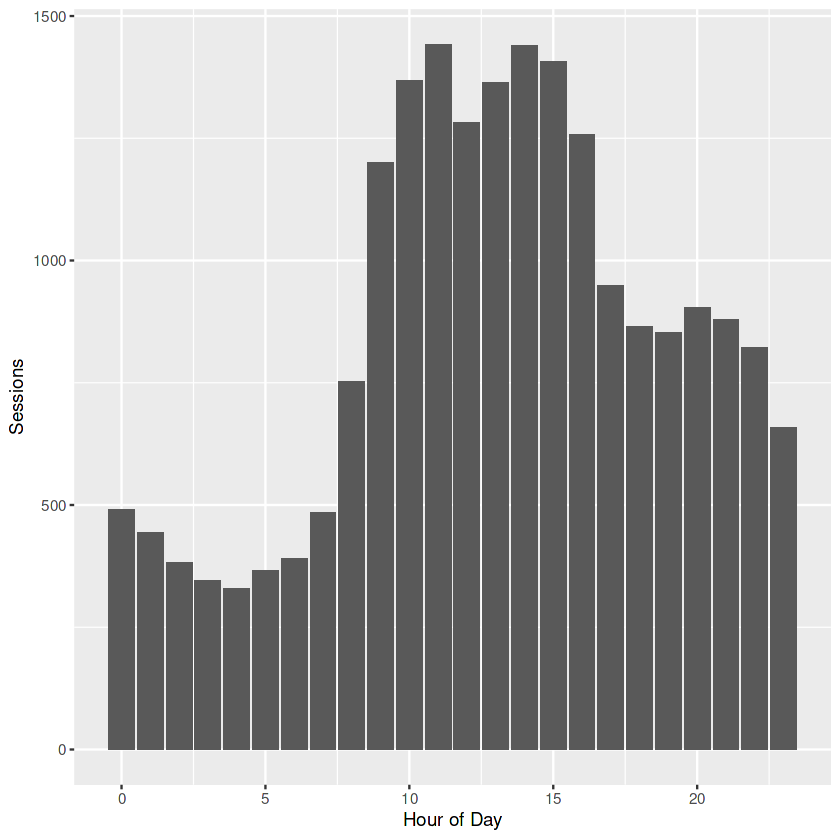

In [21]:
ggplot(Hits_by_Hour_of_Day,aes(`Hour of Day`,Sessions))+geom_bar(stat='identity')

We can see that a significant amount of sessions occurred between 9 AM and 4 PM (16th Hour). Let's calculate the total amount of sessions.

#### Hourly and Weekday Activity

In [22]:
sessions_between_9AM_4PM <- Hits_by_Hour_of_Day %>%
  filter(`Hour of Day`>= 9 & `Hour of Day` <= 16) %>% 
  summarise(session_pct = sum(Sessions))

sessions_between_9AM_4PM

(sessions_between_9AM_4PM/total_sessions)*100

session_pct
<dbl>
10765


session_pct
<dbl>
54.73079


This means that 54.7% of total sessions occurred between 9 AM and 4 PM.

Let's take a look at sessions by weekday

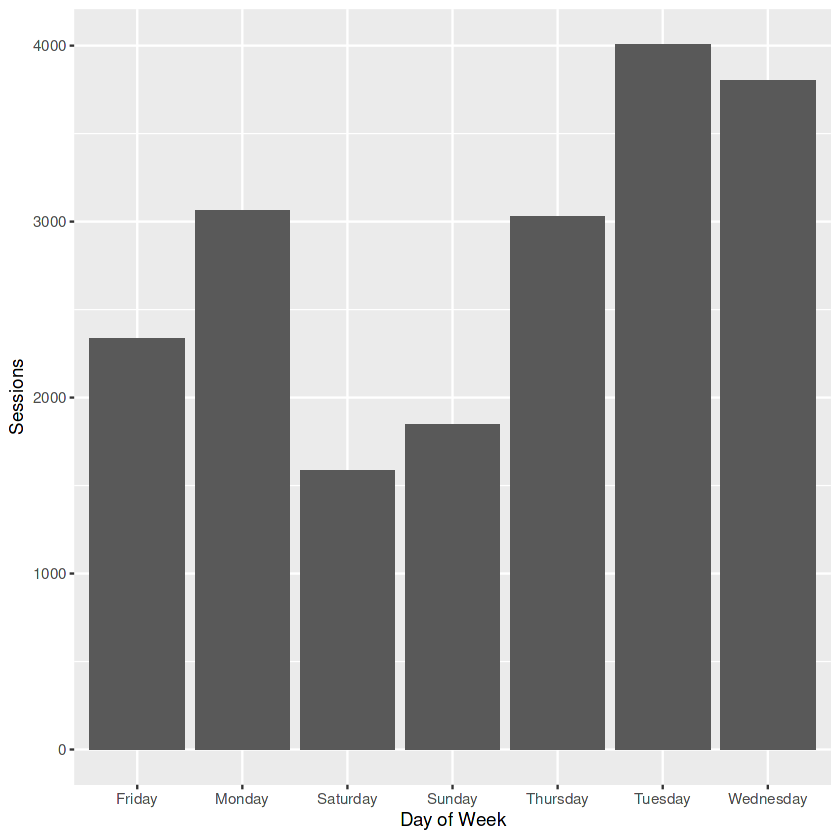

In [23]:
Visits_by_Weekday <- slice(Visits_by_Weekday,2:n())
ggplot(Visits_by_Weekday, aes(`Day of Week`,Sessions)) + geom_bar(stat='identity')

We can see that majority of sessions occurred on a weekday versus weekend. Let's determine exactly how much.

In [24]:
#determine number of sessions occurred on a weekday

weekday_sessions <- Visits_by_Weekday %>% 
  filter(`Day of Week` != "Saturday" & `Day of Week` != "Sunday") %>% 
  summarise(weekday_sessions = sum(Sessions))

weekday_sessions_pct <- (weekday_sessions/total_sessions)*100

weekend_sessions <- Visits_by_Weekday %>% 
  filter(`Day of Week` == "Saturday" | `Day of Week` == "Sunday") %>% 
  summarise(weekend_sessions = sum(Sessions))

weekend_sessions_pct <- (weekend_sessions/total_sessions)*100 

weekday_sessions 
weekday_sessions_pct
weekend_sessions
weekend_sessions_pct

weekday_sessions
<dbl>
16234


weekday_sessions
<dbl>
82.53597


weekend_sessions
<dbl>
3435


weekend_sessions
<dbl>
17.46403


Therefore 82.5% of Sessions occurred on a Weekday and 17.5% Sessions occurred on a Weekend.

#### % of New vs. Returning Users

Let's calculate the percentage of new users and returning users.

total_users
<dbl>
15739


New-Returning User,Sessions,Views,Clicks,Avg Session Duration (Sec),Bounce Rate %,Views per Session,Users,Users_pct
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
new users,12852,27109,27913,304.0046,0.7213663,2.109322,12883,81.85399327
returning users,6639,22004,31167,482.0880,0.3993071,3.314355,2853,18.12694580
users not accepting cookies,3,3,7,98.0000,1.0000000,1.000000,3,0.01906093


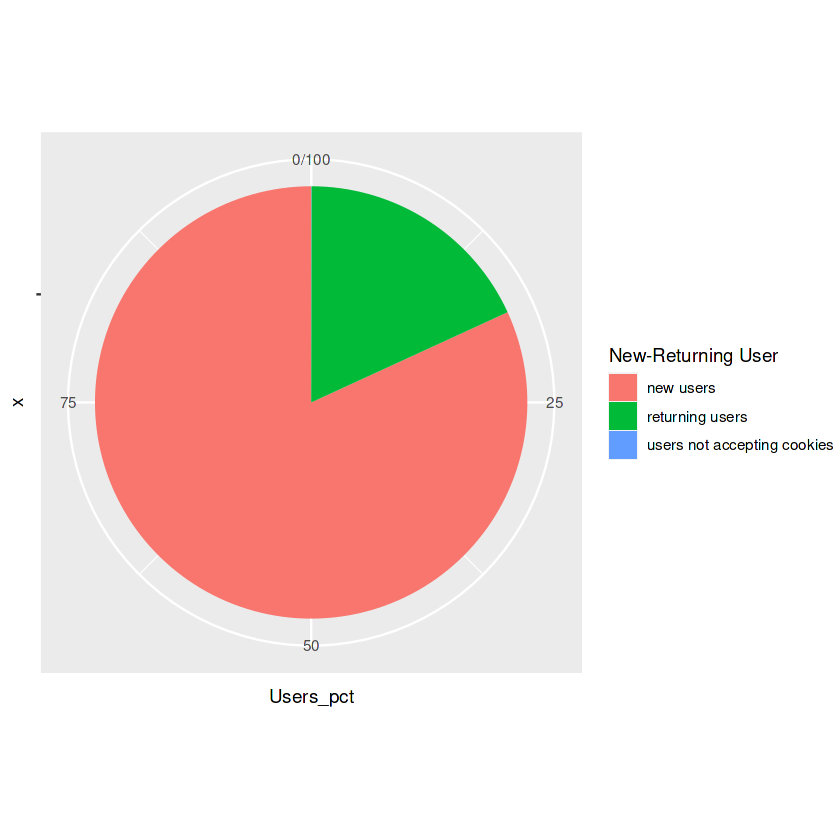

In [25]:
#Remove the first row
New_Return_Visitors <- slice(New_Return_Visitors, 2:n())

total_users <- New_Return_Visitors %>% 
  summarise(total_users = sum(Users))

total_users

New_Return_Visitors <- New_Return_Visitors %>% 
  mutate(Users_pct = (Users/sum(Users))*100)

head(New_Return_Visitors)

ggplot(New_Return_Visitors, aes(x="", y=Users_pct, fill=`New-Returning User`)) + geom_bar(stat="identity", width=1) + coord_polar("y", start=0)

So 81.9% of total users are new users, while only 18.1% of total users are returning users.

#### Top 5 Browsers and Mobile Devices

In [26]:
head(Browser)

head(Mobile_Devices)

Browser Name,Sessions,Views
<chr>,<dbl>,<dbl>
NA,19576,49025
Chrome,14011,33876
Edge,2112,7404
Safari,2109,4588
Chrome Mobile,656,1247
Firefox,536,1573


Device Name,Sessions,Views
<chr>,<dbl>,<dbl>
NA,1259,2160
Iphone,1102,1857
Ipad,81,178
Galaxy S8,10,16
Galaxy A5,4,4
Galaxy J3,3,5


This list is useful to ensure that the website is accessible through the listed Browsers and Devices.
Let calculate the % of sessions involved a Mobile Device.

In [27]:
mobile_devices_total_session <- Mobile_Devices %>% 
  summarise(mobile_devices_total_session = sum(Sessions[-1]))

mobile_devices_pct <- (mobile_devices_total_session/total_sessions)*100

mobile_devices_total_session 

mobile_devices_pct

mobile_devices_total_session
<dbl>
1259


mobile_devices_total_session
<dbl>
6.400935


Only 6.4% of Total Sessions involved a Mobile Device. 

#### Most Popular Page

In [28]:
head(Top_Pages)

Page,Sessions,Views,Avg View Time (Sec),Entry Page %,Exit Page %,Bounce Rate %,Views per Session,avg_view_time_mins
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<Period>
NA,4013960,7847854,123.34867,1.0000000,1.0000000,0.6795623,1.955140,2M 3.3486676992113S
City Of Toronto||www.toronto.ca/,483757,531081,83.34368,0.9187815,0.8173753,0.7498186,1.097826,1M 23.3436795164738S
Waste Reduction||www.toronto.ca/services-payments/recycling-organics-garbage/long-term-waste-strategy/waste-reduction/,127114,156646,304.54759,0.9781771,0.9787435,0.8657898,1.232327,5M 4.5475895017683S
"Services & Payments, Parking Violation Notice Lookup||secure.toronto.ca/webapps/parking/",121590,199886,205.66562,0.9708529,0.9153302,0.5082573,1.643935,3M 25.665620661241S
Pay Your Parking Violation||www.toronto.ca/services-payments/tickets-fines-penalties/pay/pay-your-parking-violation/,107563,134758,141.68577,0.4049255,0.8251257,0.2665415,1.252829,2M 21.6857732855125S
Search Results||find.toronto.ca/searchblox/servlet/searchservlet,90204,169965,96.99207,0.9800896,0.9770188,0.6266241,1.884229,1M 36.9920693110443S


The toronto.ca Homepage was the most popular page (by session) and was viewed for an average of 2 Minutes and 3 Seconds.

#### Recommendations

The purpose of a city website is to provide information and services for residents. 

City website are meant to market the city attractions and help residents be informed with official announcements and alerts. Therefore it is important that users regularly visit the website.

* Insight: Only 18.1% of total users are returning users and toronto.ca is the most popular page.
  + Recommendations: Retain users by the following:
    - Collect user email address and create an newsletter
    - Use Push Notifications on browser or mobile app
    - Get Users to follow you on social media

This steps can contain links that bring users back to your site. 
Since toronto.ca is the most popular page, this page should have links to email subscriptions and push notifications. The site could also integrate and embed the social media directly on the page. 

* Insight: People are more likely to visit your site between 9 AM and 4 PM on a weekday (i.e. during working hours). 
  + Recommendations: 
    - Post social media content and email campaigns during these times.
    - Plan when to make changes to your website
    - Plan site maintenance outside of these hours 
    
* Insight: Only 6.4% of total Sessions involved a Mobile Device.
One reason for this could be that the website is not mobile friendly. We could conduct a survey to ask users which device they prefer to use on the website and why.
  + Recommendations: As of November 2022, about half of worldwide web traffic came from mobile devices. So it is imporant that the site is mobile friendly. 
    - Make website responsive to different mobile devices screen sizes.
    - Optimise online forms for mobiles
    - Improve mobile navigation
    - Optimize mobile page speed
    
* Insight: The average session duration is 5 minutes 36 seconds
  + Recommendations: An AI Chatbot or live chat can help increase session duration and help users get answers quickly 
  
  
#### Appendix
* [https://drudesk.com/blog/build-municipal-website]("https://drudesk.com/blog/build-municipal-website")
* [https://www.monsterinsights.com/proven-ways-to-increase-your-returning-visitor-rate/]("https://www.monsterinsights.com/proven-ways-to-increase-your-returning-visitor-rate/")
* [https://explodingtopics.com/blog/mobile-internet-traffic]("https://explodingtopics.com/blog/mobile-internet-traffic")
* [https://www.vertical-leap.uk/blog/9-reasons-website-doesnt-work-mobile/]("https://www.vertical-leap.uk/blog/9-reasons-website-doesnt-work-mobile/")